# **🗃️ Data Lab**

In [ ]:
import time
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# @markdown \

# ============
# Parameters
# ============

n_samples = 500 # @param {type:"integer"}
type_dataset = "blobs" # @param ["noisy_circles", "noisy_moons", "blobs", "no_structure", "anisotropic", "varied_var"]
noise = 0.04 # @param {type:"slider", min:0, max:0.5, step:0.01}
angle_aniso = 100 # @param {type:"slider", min:0, max:180, step:10}
random_state = 2 # @param {type:"integer"}


# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============

if type_dataset == "noisy_circles":
  X, _ = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)

elif type_dataset == "noisy_moons":
  X, _ = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)

elif type_dataset == "blobs":
  X, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
  X += np.random.rand(n_samples, 2)*noise*X.min()

elif type_dataset == "no_structure":
  X = np.random.rand(n_samples, 2)

elif type_dataset == "anisotropic":
  X, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
  t = np.tan(np.radians(angle_aniso))
  transformation = np.array(((1, t), (0, 1))).T
  X = np.dot(X, transformation)
  X += np.random.rand(n_samples, 2)*noise*X.min()

elif type_dataset == "varied_var":
  X, _ = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
  X += np.random.rand(n_samples, 2)*noise*X.min()

X = StandardScaler().fit_transform(X)

_, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:, 0], X[:, 1], edgecolors='k')

print ("\nData shape: {0} \n".format(X.shape))

 # **📋 Set up K-Means**

In [ ]:
import os
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from natsort import natsorted, ns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from IPython.display import clear_output

# @markdown \

class Interactive_KMeans():
    def __init__ (self, n_clusters=5, nsteps=10, random_state=2):
      #
      self.n_clusters = n_clusters
      self.nsteps = nsteps
      self.random_state = np.random.RandomState(random_state)

    def plot_points(self, X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);

    def plot_centers(self, centers, edgecolors='r'):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o', facecolors="none",
                    s=200, edgecolors=edgecolors, linewidth=3)
        # plt.scatter(centers[:, 0], centers[:, 1], marker='o',
        #             c='black', s=50)

    def save_gif (self, path, output_file='out.gif'):
        list_files = natsorted(os.listdir(path), alg=ns.PATH)
        all_images = []

        # Save a gif
        for file_ in list_files[1:]:
          img = Image.open(path + file_)
          all_images.append(img)

        img = Image.open(path + list_files[0])
        img.save(output_file, save_all=True, append_images=all_images, duration=500, loop=0)
        os.system('rm -r {0}'.format(path))


    def fit(self, X, output_file='kmeans.gif', tol=1e-4, noise=0.5):
        os.makedirs('/images/', exist_ok = True)
        labels = np.zeros(X.shape[0])
        centers_ = self.random_state.randn(self.n_clusters, 2)
        converged_frame = 0

        print ("Plots... \n")

        for i in range(self.nsteps + 1):
            old_centers = centers_.copy()
            labels = pairwise_distances_argmin(X, centers_)

            centers_ = np.array([X[labels == j].mean(0) for j in range(self.n_clusters)])
            nans = np.isnan(centers_)
            centers_[nans] = old_centers[nans]+self.random_state.randn()*noise

            #Validate centers are separated enough
            for m in range(len(centers_)):
              for n in range(m+1, len(centers_)):
                if abs(centers_[m, :]-centers_[n, :]).mean()<abs(X.min()-X.max())*0.1:
                   centers_[n, :] += self.random_state.randn()*noise*0.5
                   centers_[m, :] += self.random_state.randn()*noise*0.5

            # #Validate centers are separated enough
            if abs(centers_ - old_centers).all() < tol:
              converged_frame += 1
              if converged_frame > 5: break

            # plot the data and cluster centers
            self.plot_points(X, labels, self.n_clusters)
            self.plot_centers(old_centers, edgecolors='b')

            for n in range(self.n_clusters):
                plt.annotate('', centers_[n], old_centers[n],
                            arrowprops=dict(arrowstyle='->', color='r', linewidth=3))

            self.plot_centers(centers_, edgecolors='r')

            plt.savefig('/images/{0}.png'.format(i), bbox_inches=0, pad_inches='tight')
            plt.close(), plt.clf()

        self.save_gif ('/images/', output_file=output_file)
        self.centers_ = centers_



# ============
# Parameters
# ============

n_clusters = 2 # @param {type:"integer"}
max_steps = 1 # @param {type:"integer"}
random_state = 1 # @param {type:"integer"}

kmeans = Interactive_KMeans(n_clusters=n_clusters, nsteps=max_steps, random_state=random_state);

print ("\nModel is ready!\n")


Model is ready!



# **🤖 Run training!**

In [ ]:

# @markdown ### Start now 🦾
# @markdown \

kmeans.fit(X, output_file='kmeans_{0}.gif'.format(random_state))

print ("\nTraining done! ✅")


Plots... 


Training done! ✅


<Figure size 640x480 with 0 Axes>

In [ ]:

# @markdown ### 📊 Display result
# @markdown \

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

with open('kmeans_{0}.gif'.format(random_state),'rb') as f:
    display.Image(data=f.read(), format='png')



# **👾 Selecting the (right) number of clusters**

## Elbow method


Done! ✅ 



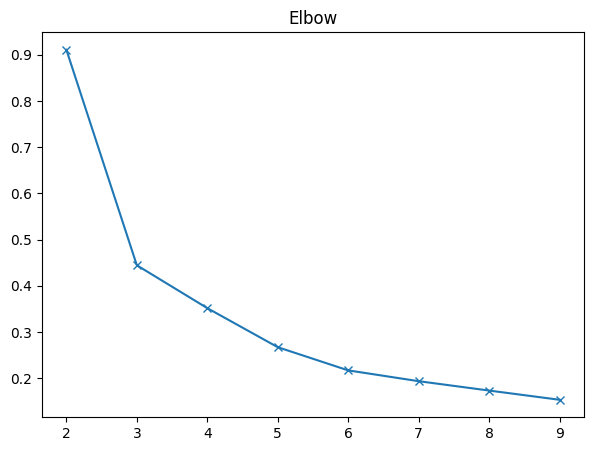

In [ ]:
from sklearn import cluster
from IPython.display import clear_output

# @markdown \

min_n_clusters = 2 # @param {type:"integer"}
max_n_clusters = 10 # @param {type:"integer"}
random_state = 1 # @param {type:"integer"}
model = "Kmeans" # @param ["Kmeans", "MiniBatchKMeans"]
random_state = 4 # @param {type:"integer"}


# Create a distance function
def euclidean_distance(pt1, pt2):
  assert len(pt1) == 2, "Error! No 2d point"
  assert len(pt2) == 2, "Error! No 2d point"
  return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2

# Define num of clusters
clusters = np.arange(min_n_clusters, max_n_clusters)
elbow_distances = []

# Eval kmeans over each num of clusters
for n_cluster in clusters :
  #
  if model == "Kmeans":
    kmeans = cluster.KMeans(n_clusters=n_cluster, random_state=random_state);
  elif model == "MiniBatchKMeans":
    kmeans = cluster.MiniBatchKMeans(n_clusters=n_cluster, random_state=random_state);

  kmeans.fit( X )

  centroids = kmeans.cluster_centers_
  predictions = kmeans.predict( X )
  distance = 0

  for i in range(len(predictions)) :
    centroide = centroids[predictions[i]]
    distance += euclidean_distance( centroide , X[i] )

  elbow_distances.append(distance/len(predictions))

# Plot the elbow
_, ax = plt.subplots (figsize = (7,5))
ax.plot( clusters , elbow_distances , marker="x")
ax.set_title("Elbow")
clear_output()

print ("\nDone! ✅ \n")

## Silhouette method


Done! ✅ 



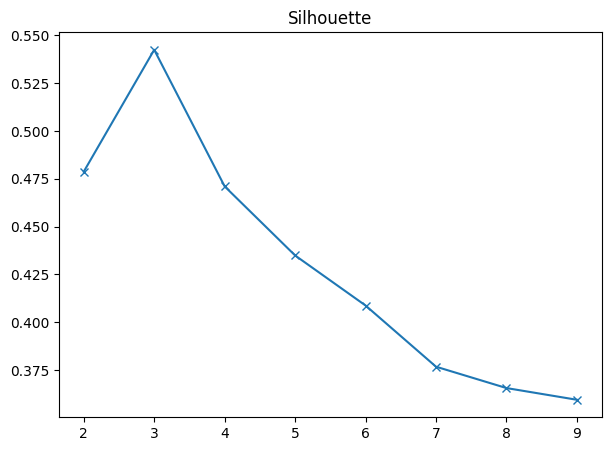

In [ ]:
from sklearn import cluster
from sklearn.metrics import silhouette_score
from IPython.display import clear_output

# @markdown \

min_n_clusters = 2 # @param {type:"integer"}
max_n_clusters = 9 # @param {type:"integer"}
random_state = 1 # @param {type:"integer"}
model = "Kmeans" # @param ["Kmeans", "MiniBatchKMeans"]
random_state = 4 # @param {type:"integer"}
metric = "euclidean" # @param ["euclidean", "cityblock", "cosine", "l1", "l2", "chebyshev", "mahalanobis"]

silhouette_distances = []

clusters = np.arange(min_n_clusters, max_n_clusters)
elbow_distances = []

# Eval kmeans over each num of clusters
for n_cluster in clusters :
  #
  if model == "Kmeans":
    kmeans = cluster.KMeans(n_clusters=n_cluster, random_state=random_state);
  elif model == "MiniBatchKMeans":
    kmeans = cluster.MiniBatchKMeans(n_clusters=n_cluster, random_state=random_state);

  kmeans.fit( X )
  predictions = kmeans.predict( X )

  distance = silhouette_score( X , predictions.reshape(-1,1) , metric=metric)
  silhouette_distances.append(distance)

# Plot the silhouette
_, ax = plt.subplots (figsize = (7,5))
ax.plot( clusters , silhouette_distances , marker="x")
ax.set_title("Silhouette")
clear_output()

print ("\nDone! ✅ \n")